# Multiple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
# Loading the dataset
dataset = pd.read_csv('hour.csv')
# Displaying the first 5 rows of the dataset
dataset.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
# Information about the dataset, including data types and null values
dataset.info()
# Shape of the dataset (number of rows and columns)
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


(17379, 17)

In [6]:
# Checking for missing values in the dataset
dataset.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Checking for duplicated rows in the dataset
dataset.duplicated().sum()

0

In [8]:
# Descriptive statistics of the dataset with styled background gradient
dataset.describe().style.background_gradient(cmap = "Purples")

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.000000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.029500,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.500000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.500000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Extracting features (X) and target variable (y) from the dataset

In [9]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

In [10]:
print(X.shape)

(17379, 14)


In [11]:
print(X)

[[ 1.      0.      1.     ...  0.      3.     13.    ]
 [ 1.      0.      1.     ...  0.      8.     32.    ]
 [ 1.      0.      1.     ...  0.      5.     27.    ]
 ...
 [ 1.      1.     12.     ...  0.1642  7.     83.    ]
 [ 1.      1.     12.     ...  0.1343 13.     48.    ]
 [ 1.      1.     12.     ...  0.1343 12.     37.    ]]


## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#In summary, setting random_state allows you to control the randomness of the data splitting process, making your experiments reproducible. It's commonly used to ensure consistency in machine learning workflows.

In [13]:
print("Trainig Data..")
print("The shape of training features: ", X_train.shape)
print("The shape of training labels: ", y_train.shape)

Trainig Data..
The shape of training features:  (13903, 14)
The shape of training labels:  (13903,)


In [14]:
print("Testing Data..")
print("The shape of testing features: ", X_test.shape)
print("The shape of testing labels: ", y_test.shape)

Testing Data..
The shape of testing features:  (3476, 14)
The shape of testing labels:  (3476,)


## Training the Multiple Linear Regression model on the Training set

In [15]:
# Fitting a linear regression model to the training data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
# Calculating and printing the training accuracy
training_acc = np.ceil(regressor.score(X_train, y_train) * 100)
print("The Training Accuracy = ", training_acc, "%")

The Training Accuracy =  100.0 %


## Predicting the Test set results

In [17]:
# Making predictions on the testing data
y_pred = regressor.predict(X_test)
# Printing the predicted and actual values side by side
np.set_printoptions(precision=2) # it sets the number of digits (precision) to display after the decimal point when printing floating-point numbers in NumPy arrays to 2 decimal places.
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[425. 425.]
 [ 88.  88.]
 [  4.   4.]
 ...
 [ 98.  98.]
 [266. 266.]
 [267. 267.]]


In [18]:
# Calculating and printing the testing accuracy
testing_acc = np.ceil(regressor.score(X_test, y_test) * 100)
print("The Testing_acc Accuracy = ", testing_acc, "%")

The Testing_acc Accuracy =  100.0 %


## Getting the final linear regression equation with the values of the coefficients

In [19]:
# Printing the coefficients and intercept of the linear regression model
print(regressor.coef_)
print(regressor.intercept_)

[ 1.11e-14 -3.12e-14 -9.21e-16 -2.19e-15 -3.86e-14  5.84e-16 -6.31e-15
 -4.48e-14 -1.55e-14  5.50e-14 -4.55e-15  1.77e-14  1.00e+00  1.00e+00]
1.1368683772161603e-13


In [20]:
# Printing the linear regression equation
print("y = %s + %s X1 + %s X2 + %s X3 + %s X4 + %s X5 + %s X6 + %s X7 + %s X8 + %s X9 + %s X10 + %s X11 + %s X12 + %s X13 + %s X14" % (
    regressor.intercept_, 
    regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], 
    regressor.coef_[3], regressor.coef_[4], regressor.coef_[5], 
    regressor.coef_[6], regressor.coef_[7], regressor.coef_[8], 
    regressor.coef_[9], regressor.coef_[10], regressor.coef_[11], 
    regressor.coef_[12], regressor.coef_[13]))

y = 1.1368683772161603e-13 + 1.1058454326845646e-14 X1 + -3.115200515819216e-14 X2 + -9.207825935582499e-16 X3 + -2.1853052286955133e-15 X4 + -3.8551199153972796e-14 X5 + 5.842729231655795e-16 X6 + -6.314197843585958e-15 X7 + -4.4814980739145547e-14 X8 + -1.5535938231782586e-14 X9 + 5.497076344979324e-14 X10 + -4.5482302918620905e-15 X11 + 1.7670202525319494e-14 X12 + 0.9999999999999997 X13 + 0.9999999999999998 X14


## Visualising

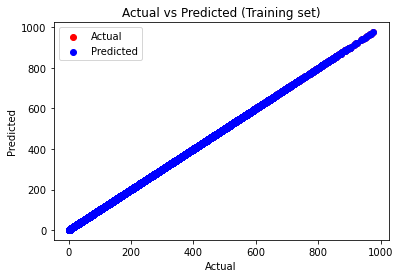

In [21]:
# Plotting the actual vs predicted values for training set
plt.scatter(y_train, regressor.predict(X_train), color='red', label='Actual')
plt.scatter(y_train, regressor.predict(X_train), color='blue', label='Predicted')
plt.title('Actual vs Predicted (Training set)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

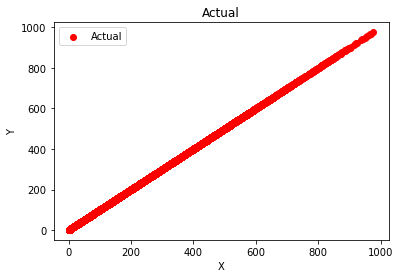

In [22]:
# Plotting the actual for training set
plt.scatter(y_train, regressor.predict(X_train), color='red', label='Actual')
plt.title('Actual')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()